# Домашняя работа №1 - использование алгоритма KNN на тестовых данных

В данном документе демонстрируется применение алгоритма машинного обучения KNN из scikit-learn с описанием предварительной обработки используемых данных.

Данные (https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data) содержат описания флагов разных стран. По информации о флаге требуется сделать предположения о религии в данной стране - относится ли религия к христианству или нет.


## Подключение библиотек

В коде используются следующие библиотеки:

* numpy 
* matplotlib
* pandas
* scikit-learn

Scikit-learn будет подключена позднее для применения алгоритма KNN.


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Загрузка и отображение исходных данных

Загрузка данных осуществляется при помощи *pandas* по ссылке. 
Сепаратор выбирается в соответствии со структурой файла (в данном случае строки в файле представляют один экземпляр данных, столбцы разделены запятыми без пробела). 
Если в файле нет заголовка таблицы с названием колонок, в функцию read_csv необходимо передать аргумент header = None. Иначе первая строка с данными будет интерпретирована как заголовок таблицы.
Т.к. в рассматриваемом примере в данные не включен заголовок, названия столбцов устанавливаются отдельно.

In [143]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'
data = pd.read_csv(url, sep = ',', engine='python', header = None)
data.columns = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue','circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

In [144]:
type(data)

pandas.core.frame.DataFrame

### Расшифровка столбцов
Описание атрибутов из https://archive.ics.uci.edu/ml/datasets/Flags
1. name:	Name of the country concerned 
2. landmass:	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania 
3. zone:	Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW 
4. area:	in thousands of square km 
5. population:	in round millions 
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others 
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others 
8. bars: Number of vertical bars in the flag 
9. stripes: Number of horizontal stripes in the flag 
10. colours: Number of different colours in the flag 
11. red: 0 if red absent, 1 if red present in the flag 
12. green: same for green 
13. blue: same for blue 
14. gold: same for gold (also yellow) 
15. white: same for white 
16. black: same for black 
17. orange: same for orange (also brown) 
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue) 
19. circles: Number of circles in the flag 
20. crosses: Number of (upright) crosses 
21. saltires: Number of diagonal crosses 
22. quarters: Number of quartered sections 
23. sunstars: Number of sun or star symbols 
24. crescent: 1 if a crescent moon symbol present, else 0 
25. triangle: 1 if any triangles present, 0 otherwise 
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0 
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise 
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise 
29. topleft: colour in the top-left corner (moving right to decide tie-breaks) 
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

### Табличное и графическое представление данных

Для отображения в виде таблицы достаточно ввести имя переменной с загруженным набором. Функции *head* и *tail* отображют необходимое количество строк с начала или конца.


In [145]:
data

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [146]:
print(data)

                     name  landmass  zone   area  population  language  \
0             Afghanistan         5     1    648          16        10   
1                 Albania         3     1     29           3         6   
2                 Algeria         4     1   2388          20         8   
3          American-Samoa         6     3      0           0         1   
4                 Andorra         3     1      0           0         6   
5                  Angola         4     2   1247           7        10   
6                Anguilla         1     4      0           0         1   
7         Antigua-Barbuda         1     4      0           0         1   
8               Argentina         2     3   2777          28         2   
9               Argentine         2     3   2777          28         2   
10              Australia         6     2   7690          15         1   
11                Austria         3     1     84           8         4   
12                Bahamas         1   

In [147]:
data.head(10)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [148]:
data.tail(10)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
184,USSR,5,1,22402,274,5,6,0,0,2,...,0,0,1,0,0,1,0,0,red,red
185,Vanuatu,6,2,15,0,6,1,0,0,4,...,0,0,0,0,1,0,1,0,black,green
186,Vatican-City,3,1,0,0,6,0,2,0,4,...,0,0,0,0,0,1,0,0,gold,white
187,Venezuela,2,4,912,15,2,0,0,3,7,...,0,0,7,0,0,1,1,0,gold,red
188,Vietnam,5,1,333,60,10,6,0,0,2,...,0,0,1,0,0,0,0,0,red,red
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown
193,Zimbabwe,4,2,391,8,10,5,0,7,5,...,0,0,1,0,1,1,1,0,green,green


Так как в предоставленных данных значения категориальных признаков заменены на числовые коды, можно создать копию данных для более удобного восприятия человеком.
Для этого преобразуем столбцы в тип 'category' и при помощи cat.categories осуществим переименование категорий.

In [149]:
human_data=data.copy();

human_data["language"] = human_data["language"].astype('category')
human_data["language"].cat.categories = ['English', 'Spanish', 'French', 'German', 'Slavic', 'Other Indo-European', 'Chinese', 'Arabic', 'Japanese/Turkish/Finnish/Magyar', 'Others']
human_data["religion"] = human_data["religion"].astype('category')
human_data["religion"].cat.categories=['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
human_data["landmass"] = human_data["landmass"].astype('category')
human_data["landmass"].cat.categories=['N.America', 'S.America', 'Europe', 'Africa', 'Asia', 'Oceania']
human_data["zone"] = human_data["zone"].astype('category')
human_data["zone"].cat.categories=['NE', 'SE', 'SW', 'NW']



In [150]:
human_data

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,Asia,NE,648,16,Others,Muslim,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,Europe,NE,29,3,Other Indo-European,Marxist,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,Africa,NE,2388,20,Arabic,Muslim,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,Oceania,SW,0,0,English,Other Christian,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,Europe,NE,0,0,Other Indo-European,Catholic,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,Africa,SE,1247,7,Others,Ethnic,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,N.America,NW,0,0,English,Other Christian,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,N.America,NW,0,0,English,Other Christian,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,S.America,SW,2777,28,Spanish,Catholic,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,S.America,SW,2777,28,Spanish,Catholic,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


Для получения некоторых математических характеристик данных используется функция describe.

In [151]:
data.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Для первоначального анализа данных без помощи алгоритмов машинного обучения могут оказаться полезными функции scatter_matrix для попарного соотношения между переменными и corr для построения матрицы корреляций

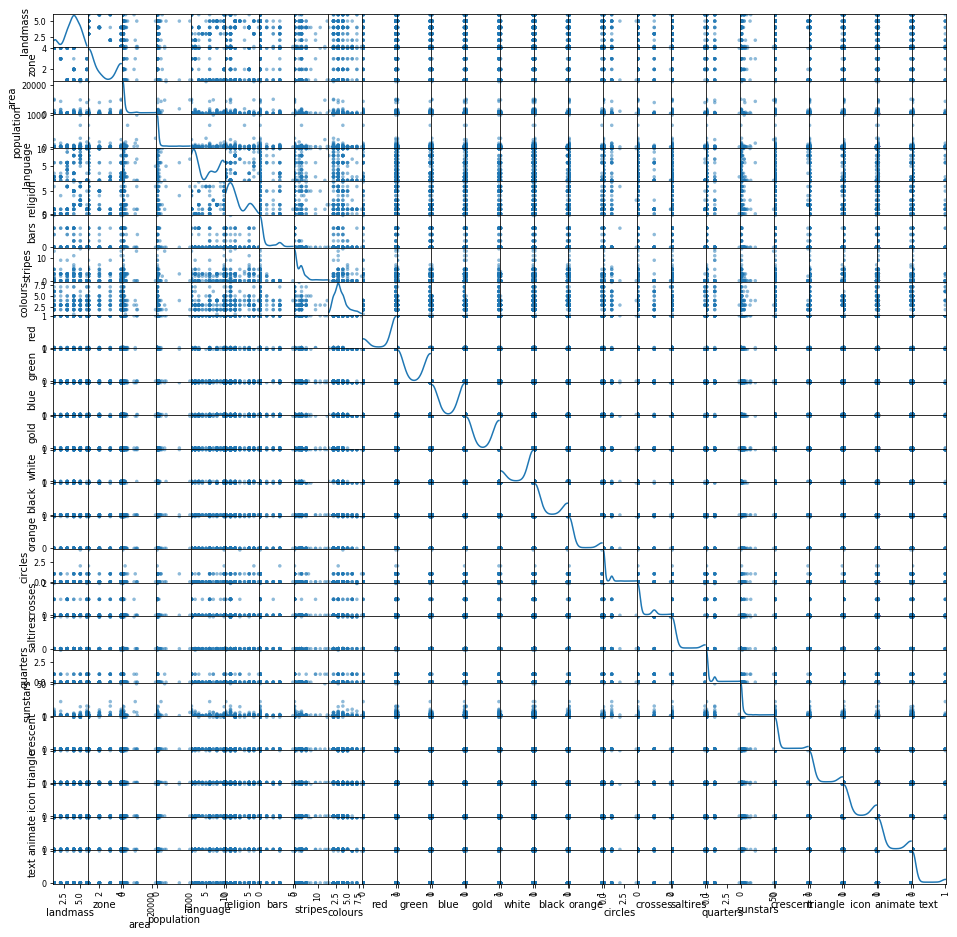

In [152]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .5, figsize = (16, 16), diagonal='kde', s=50)
pass

In [153]:
data.corr()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
landmass,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,0.093400,...,0.065696,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743
zone,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,-0.032269,...,-0.042542,0.101441,0.179667,0.153300,0.121754,-0.159272,0.060416,-0.048692,0.106034,0.037602
area,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,-0.005470,...,-0.005652,-0.057888,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423
population,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,-0.024648,...,0.051257,-0.076305,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194
language,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,-0.011048,...,0.098476,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977
religion,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,0.121721,...,0.123260,-0.225238,-0.133373,-0.135713,-0.075081,0.053145,0.056868,0.055714,-0.002741,-0.055158
bars,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,-0.017093,...,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709
stripes,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,0.014210,...,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564
colours,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,0.311759,...,0.178062,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483
red,0.093400,-0.032269,-0.005470,-0.024648,-0.011048,0.121721,-0.017093,0.014210,0.311759,1.000000,...,0.108639,0.102772,0.122031,0.119914,0.019726,-0.091458,0.025760,0.097513,0.133648,0.017507


Логические операции могут быть применены к целому столбцу данных

In [154]:
data['religion'] == 0

0      False
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8       True
9       True
10     False
11      True
12     False
13     False
14     False
15     False
16      True
17     False
18     False
19     False
20     False
21      True
22     False
23      True
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181     True
182    False
183    False
184    False
185    False
186     True
187     True
188    False
189    False
190    False
191    False
192    False
193    False
Name: religion, Length: 194, dtype: bool

Построение графиков возможно при помощи функции plot у DataFrame или специальных функций библиотеки pyplot.

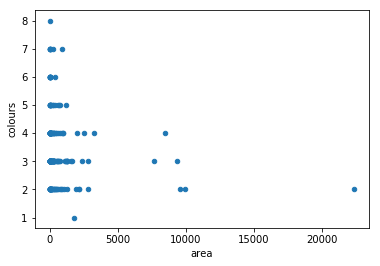

In [155]:
data.plot(x='area',y='colours', kind='scatter')
pass


Для наглядного отображения дискретных данных можно воспользоваться приемом с добавлением некоторого случайного отклонения к значениям при помощи numpy.random 

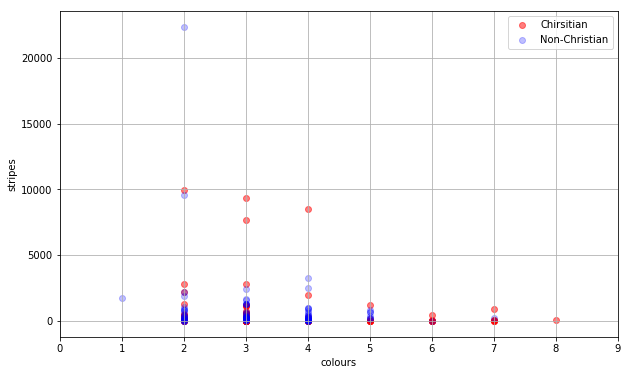

In [156]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['religion'] < 2]['colours'],
            data[data['religion'] < 2]['area'],
            alpha = 0.5,
            label = 'Chirsitian',
            color = 'r')

plt.scatter(data[data['religion'] >= 2]['colours'],
            data[data['religion'] >= 2]['area'],
            alpha = 0.25,
            label = 'Non-Christian',
            color = 'b')

plt.xlabel('colours')
plt.xticks(range(10))
plt.xlim(0, 9)
plt.ylabel('stripes')
plt.legend()
plt.grid()

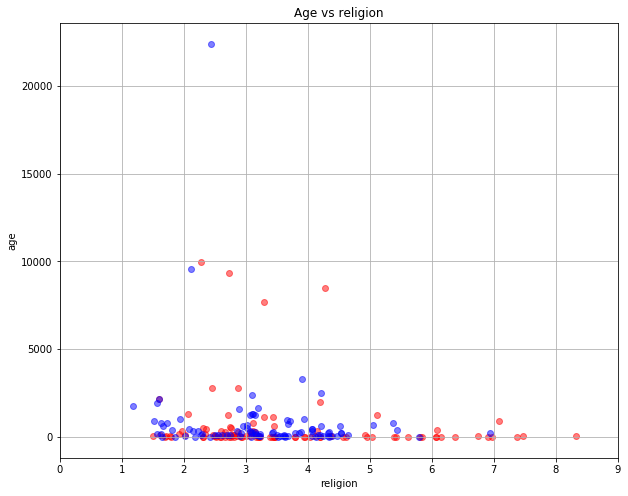

In [158]:
np.random.seed(0)
education_num_rnd = data['colours'] + np.random.rand(data.shape[0]) - .5
education_num_rnd2 = data['area'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['religion'] < 2],
            education_num_rnd2[data['religion'] < 2],
            alpha = 0.5,
            label = 'Chirsitian',
            color = 'r')

plt.scatter(education_num_rnd[data['religion'] >= 2],
            education_num_rnd2[data['religion'] >= 2],
            alpha = 0.5,
            label = 'Non-Christian',
            color = 'b')

plt.xlabel('religion')
plt.xticks(range(10))
plt.xlim(0, 9)
plt.ylabel('age')
plt.title('Age vs religion')
plt.grid()

По умолчанию функция describe не выводит информацию о категориальных признаках - для этого нужно передавать специальные параметры.

In [89]:
data.describe(include = ['object'])


,name,mainhue,topleft,botright
count,194,194,194,194
unique,194,8,7,8
top,Burundi,red,red,red
freq,1,71,56,69


In [90]:
data.describe(include = 'all')

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
count,194,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194,194
unique,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8
top,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red,red
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,69
mean,NaN,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,...,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474,NaN,NaN
std,NaN,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,...,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798,NaN,NaN
min,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000,NaN,NaN


Получить уникальные значения категориальных признаков возможно с помощью функции unique

In [91]:
human_data['language'].unique()

[Others, Other Indo-European, Arabic, English, Spanish, German, French, Slavic, Chinese, Japanese/Turkish/Finnish/Magyar]
Categories (10, object): [Others, Other Indo-European, Arabic, English, ..., French, Slavic, Chinese, Japanese/Turkish/Finnish/Magyar]

In [92]:
human_data['religion'].unique()

[Muslim, Marxist, Other Christian, Catholic, Ethnic, Buddhist, Hindu, Others]
Categories (8, object): [Muslim, Marxist, Other Christian, Catholic, Ethnic, Buddhist, Hindu, Others]

In [159]:
human_data['zone'].unique()

[NE, SW, SE, NW]
Categories (4, object): [NE, SW, SE, NW]

Далее показан пример подсчета количества стран с определенной религией.

In [93]:
for name in human_data['religion'].unique():
    print(name, data['religion'][human_data['religion'] == name].iloc[0])

Muslim 2
Marxist 6
Other Christian 1
Catholic 0
Ethnic 5
Buddhist 3
Hindu 4
Others 7


## Задача и подготовка данных
Перед применением алгоритма машинного обучения требуется заполнить пропущенные значения в строках, векторизовать категориальные признаки и нормализовать численные.



In [95]:
data = data.drop('name', axis = 1)
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['mainhue', 'topleft', 'botright']
['landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text']


In [96]:
for c in categorical_columns:
    print(c, data[c].unique())

mainhue ['green' 'red' 'blue' 'gold' 'white' 'orange' 'black' 'brown']
topleft ['black' 'red' 'green' 'blue' 'white' 'orange' 'gold']
botright ['green' 'red' 'white' 'black' 'blue' 'gold' 'orange' 'brown']


Преобразуем колонку с религией в бинарный формат для предсказания - принадлежит религия к христианским (0) или нет (1)

In [97]:

data.at[data['religion'] < 2, 'religion'] = 0
data.at[data['religion'] >= 2, 'religion'] = 1

In [98]:
data


,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,5,1,648,16,10,1,0,3,5,1,...,0,0,1,0,0,1,0,0,black,green
1,3,1,29,3,6,1,0,0,3,1,...,0,0,1,0,0,0,1,0,red,red
2,4,1,2388,20,8,1,2,0,3,1,...,0,0,1,1,0,0,0,0,green,white
3,6,3,0,0,1,0,0,0,5,1,...,0,0,0,0,1,1,1,0,blue,red
4,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,blue,red
5,4,2,1247,7,10,1,0,2,3,1,...,0,0,1,0,0,1,0,0,red,black
6,1,4,0,0,1,0,0,1,3,0,...,0,0,0,0,0,0,1,0,white,blue
7,1,4,0,0,1,0,0,1,5,1,...,0,0,1,0,1,0,0,0,black,red
8,2,3,2777,28,2,0,0,3,2,0,...,0,0,0,0,0,0,0,0,blue,blue
9,2,3,2777,28,2,0,0,3,3,0,...,0,0,1,0,0,0,0,0,blue,blue


Пропущенных значений в таблице нет.

## Векторизация


In [160]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['mainhue', 'topleft', 'botright']


In [161]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['mainhue_black', 'mainhue_blue', 'mainhue_brown', 'mainhue_gold',
       'mainhue_green', 'mainhue_orange', 'mainhue_red', 'mainhue_white',
       'topleft_black', 'topleft_blue', 'topleft_gold', 'topleft_green',
       'topleft_orange', 'topleft_red', 'topleft_white', 'botright_black',
       'botright_blue', 'botright_brown', 'botright_gold', 'botright_green',
       'botright_orange', 'botright_red', 'botright_white'],
      dtype='object')


## Нормализация

In [103]:
data_numerical = data[numerical_columns]
religion = data_numerical['religion']
data_numerical = data_numerical.drop('religion',axis=1)
data_numerical.describe()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,0.453608,1.551546,3.463918,0.788660,0.469072,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,1.038339,2.328005,1.300154,0.409315,0.500334,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,0.000000,3.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,5.000000,14.000000,8.000000,1.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [107]:
data_numerical.describe()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,...,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02
mean,2.861400e-18,6.037553e-17,-1.230402e-17,5.722799e-19,5.264975e-17,2.661102e-17,8.927567e-17,-5.837255e-17,4.120415e-17,6.867359e-18,...,-2.174664e-16,8.526971e-17,-1.024381e-16,1.774068e-17,-6.588372e-17,-7.725779e-18,9.385391e-17,-5.264975e-17,-8.469743e-17,1.304798e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.656237e+00,-9.259072e-01,-3.224641e-01,-2.530948e-01,-1.241294e+00,-4.368596e-01,-6.664703e-01,-1.895096e+00,-1.926778e+00,-9.375186e-01,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-3.154093e-01,-2.445393e-01,-4.010527e-01,-5.798182e-01,-5.003158e-01,-2.990390e-01
25%,-3.684214e-01,-9.259072e-01,-3.183184e-01,-2.530948e-01,-9.552954e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,-9.375186e-01,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-3.154093e-01,-2.445393e-01,-4.010527e-01,-5.798182e-01,-5.003158e-01,-2.990390e-01
50%,2.754863e-01,-1.615413e-01,-2.713339e-01,-2.095854e-01,1.887003e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,-9.375186e-01,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-3.154093e-01,-2.445393e-01,-4.010527e-01,-5.798182e-01,-5.003158e-01,-2.990390e-01
75%,9.193940e-01,1.367191e+00,-1.053911e-01,-1.008118e-01,1.046697e+00,-4.368596e-01,6.221865e-01,4.123222e-01,5.163260e-01,1.061147e+00,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-8.793939e-02,-2.445393e-01,-4.010527e-01,1.141887e+00,-5.003158e-01,-2.990390e-01
max,1.563302e+00,1.367191e+00,9.996626e+00,1.071128e+01,1.332696e+00,4.378524e+00,5.347262e+00,3.488880e+00,5.163260e-01,1.061147e+00,...,8.270578e+00,4.801708e+00,3.118874e+00,8.834297e+00,1.105809e+01,4.068244e+00,2.480585e+00,1.715788e+00,1.988435e+00,3.326808e+00


In [108]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns],data['religion']), axis = 1)
print(data.shape)

(194, 49)


In [109]:
data.describe()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white,religion
count,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,2.861400e-18,6.037553e-17,-1.230402e-17,5.722799e-19,5.264975e-17,2.661102e-17,8.927567e-17,-5.837255e-17,4.120415e-17,6.867359e-18,...,0.211340,0.046392,0.242268,0.010309,0.046392,0.206186,0.005155,0.355670,0.087629,0.484536
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.409315,0.210876,0.429564,0.101271,0.210876,0.405612,0.071796,0.479954,0.283486,0.501054
min,-1.656237e+00,-9.259072e-01,-3.224641e-01,-2.530948e-01,-1.241294e+00,-4.368596e-01,-6.664703e-01,-1.895096e+00,-1.926778e+00,-9.375186e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.684214e-01,-9.259072e-01,-3.183184e-01,-2.530948e-01,-9.552954e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,-9.375186e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.754863e-01,-1.615413e-01,-2.713339e-01,-2.095854e-01,1.887003e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,-9.375186e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.193940e-01,1.367191e+00,-1.053911e-01,-1.008118e-01,1.046697e+00,-4.368596e-01,6.221865e-01,4.123222e-01,5.163260e-01,1.061147e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.563302e+00,1.367191e+00,9.996626e+00,1.071128e+01,1.332696e+00,4.378524e+00,5.347262e+00,3.488880e+00,5.163260e-01,1.061147e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Применение алгоритма KNN

In [120]:
X = data.drop(('religion'), axis = 1) 
y = data['religion']
feature_names = X.columns

In [119]:
type(feature_names)

pandas.core.indexes.base.Index

In [121]:
print(X.shape)
print(y.shape)
N, d = X.shape

(194, 48)
(194,)


In [113]:
type(X)

pandas.core.frame.DataFrame

In [114]:
type(y)

pandas.core.series.Series

При помощи встроенных функций легко разбить данные на тестовую и обучающую выборки.

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

135 59


In [116]:
135+59

194

In [117]:
type(y_train)

pandas.core.series.Series

Функция fit производит обучение алгоритма на обучающей выборке

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [122]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Обученным алгоритмом при помощи функции predict осуществляем предсказание, затем измеряем ошибку на тестовой и обучающей выборках.

In [123]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.22962962963 0.322033898305


In [124]:
err_test = 1 - knn.score(X_test, y_test)

In [125]:
err_test

0.32203389830508478

In [126]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[27  6]
 [13 13]]


In [127]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

## Подбор параметров алгоритма для снижения ошибки

In [129]:
#from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.214814814815 45


In [130]:

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2 0.254237288136
